# Вариант 2



# Задание 1


Вычислить х* на интервале [-5;5] при точности ε=0,01 
1. методом половинного деления, 
2. методом касательных и 
3. методом простых итераций, 
4. сравнить получившиеся значения; 
5. построить график функции f(x). 
6. Использовать решатели Python


y = x**3 + 4.888*x**2 - 2.930*x - 14.149


In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def func(x):
    y = x**3 + 4.888*x**2 - 2.930*x - 14.149
    return y

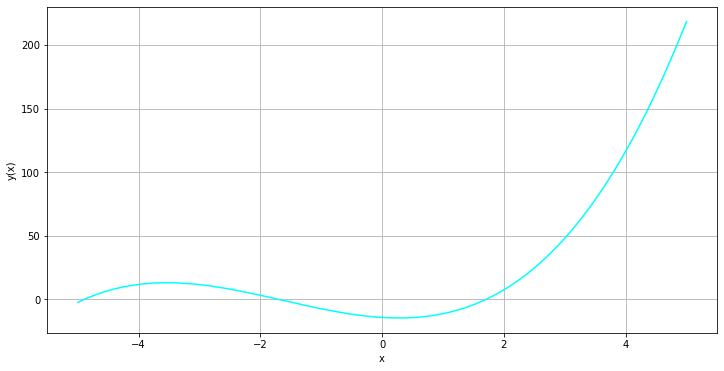

In [25]:
x = np.linspace(-5, 5, 1000)
y = func(x)
plt.figure(figsize = (12,6))
plt.plot(x, y, color = 'aqua')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid()
plt.show()

## Метод половинного деления

In [4]:
def bisect(f, a, b, eps = 0.01):
    while True:
        c = (a+b)/2
        if f(c)*f(a) < 0:
            b = c
        else:
            a = c
        if abs(f(c)) < eps:
            return c, f(c) 

In [7]:
bisect(func, -5, 5, 0.01)[0]

1.7041015625

## Метод касательных

Введем производную:

In [9]:
def f_der(x):
    return 3* x**2 + 2* 4.888*x - 2.930

In [10]:
def newton(f, f_der, x, eps = 0.01):
    while True: 
        x = x - f(x) / f_der(x)
        if abs(f(x)) < eps:
            return x, f(x)

In [12]:
newton(func, f_der, 0.)[0]

-4.896215940903723

## Метод простых итераций

In [13]:
def fixiter(f, f_der, x, eps = 0.01):
    while True:
        l = 1/f_der(x)
        x = x - l* f(x)
        if abs(f(x)) < eps:
            return x, f(x)

In [15]:
fixiter(func, f_der, 0.)[0]

-4.896215940903723

## Root (scipy)

In [16]:
from scipy.optimize import root

In [19]:
root(func, 3)['x']

array([1.70404828])

__Сравнение методов__

Корни найдены верны, но разные методы находят разные корни - всего их три